In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageChops
from tensorflow.keras.preprocessing.image import img_to_array

2024-04-28 19:00:04.580490: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from tensorflow.keras.models import load_model

model = load_model('../models/save/model_X.keras')

In [3]:
input_shape = (256, 256, 3)

def predict_image(model, image_path):
    image = Image.open(image_path).convert('RGB').resize(input_shape[:2])
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
    mask = model.predict(image_array)
    return mask

image_path = '../Example/U-net/images_val/frankfurt_000001_031416.png'
image_path = '../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/test/berlin/berlin_000000_000019_leftImg8bit.png'
image_path = '../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/aachen/aachen_000000_000019_leftImg8bit.png'
predicted_mask = predict_image(model, image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [4]:
mask1 = predicted_mask[0].copy()
segmentation_map = np.argmax(mask1, axis=-1)
tableau_transforme = np.expand_dims(segmentation_map, axis=-1)
first_mask_array = np.uint8(tableau_transforme)
transformed_array = np.repeat(first_mask_array, 3, axis=2)
for x in range(transformed_array.shape[0]):
    for y in range(transformed_array.shape[1]):
        if (transformed_array[x, y] == [0, 0, 0]).all():
            transformed_array[x, y] = [250, 170, 30]
        elif (transformed_array[x, y] == [1, 1, 1]).all():
            transformed_array[x, y] = [0, 0, 142]
        elif (transformed_array[x, y] == [2, 2, 2]).all():
            transformed_array[x, y] = [102, 102, 156]
        elif (transformed_array[x, y] == [3, 3, 3]).all():
            transformed_array[x, y] = [220, 20, 60]
        elif (transformed_array[x, y] == [4, 4, 4]).all():
            transformed_array[x, y] = [153, 153, 153]
        elif (transformed_array[x, y] == [5, 5, 5]).all():
            transformed_array[x, y] = [244, 35, 232]
        elif (transformed_array[x, y] == [6, 6, 6]).all():
            transformed_array[x, y] = [70, 70, 70]
        elif (transformed_array[x, y] == [7, 7, 7]).all():
            transformed_array[x, y] = [70, 130, 180]

In [5]:
pil_mask = Image.fromarray(transformed_array)
pil_mask = pil_mask.resize((2048, 1024))

In [6]:
pil_mask = pil_mask.convert("RGBA")
transparency = 255
mask_data = [(r, g, b, transparency) for r, g, b, _ in pil_mask.getdata()]
pil_mask.putdata(mask_data)

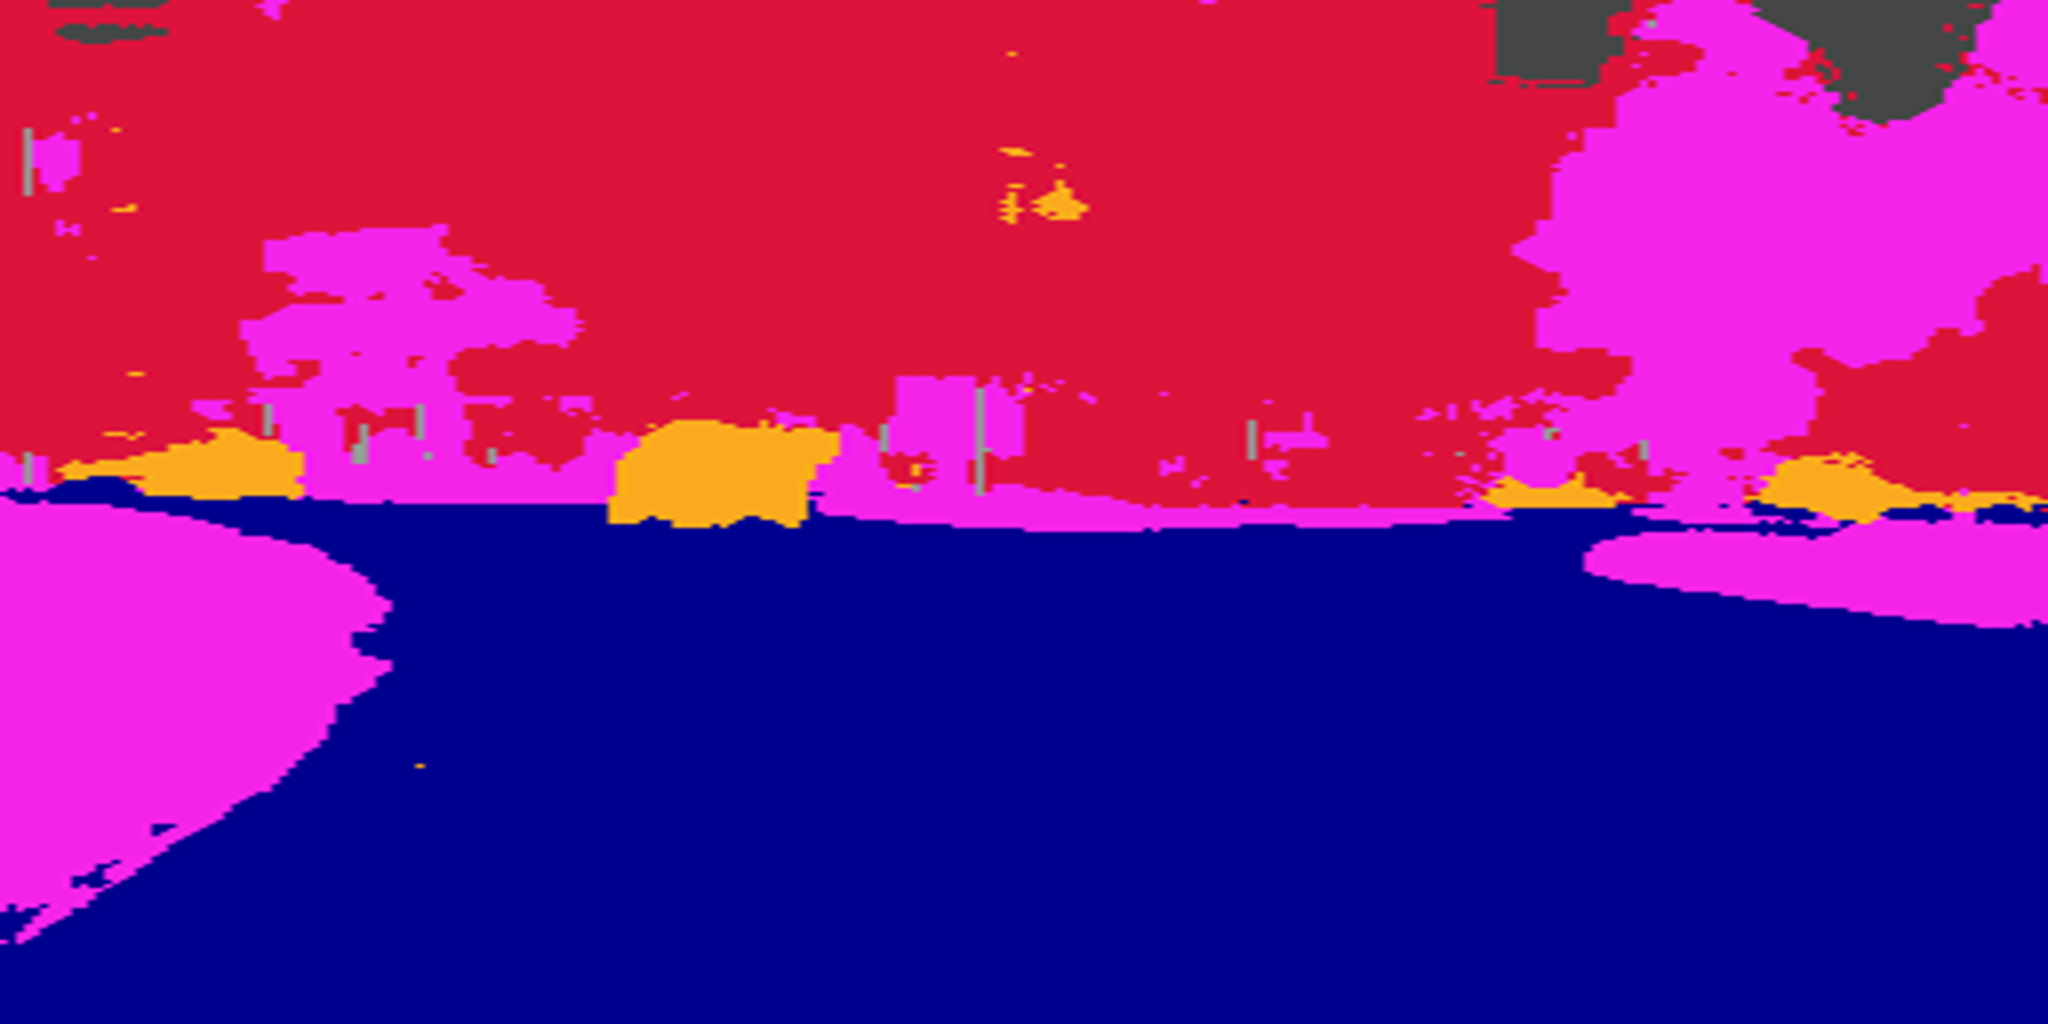

In [7]:
test1 = Image.open(image_path)
test1.paste(pil_mask, (0, 0), pil_mask)
test1

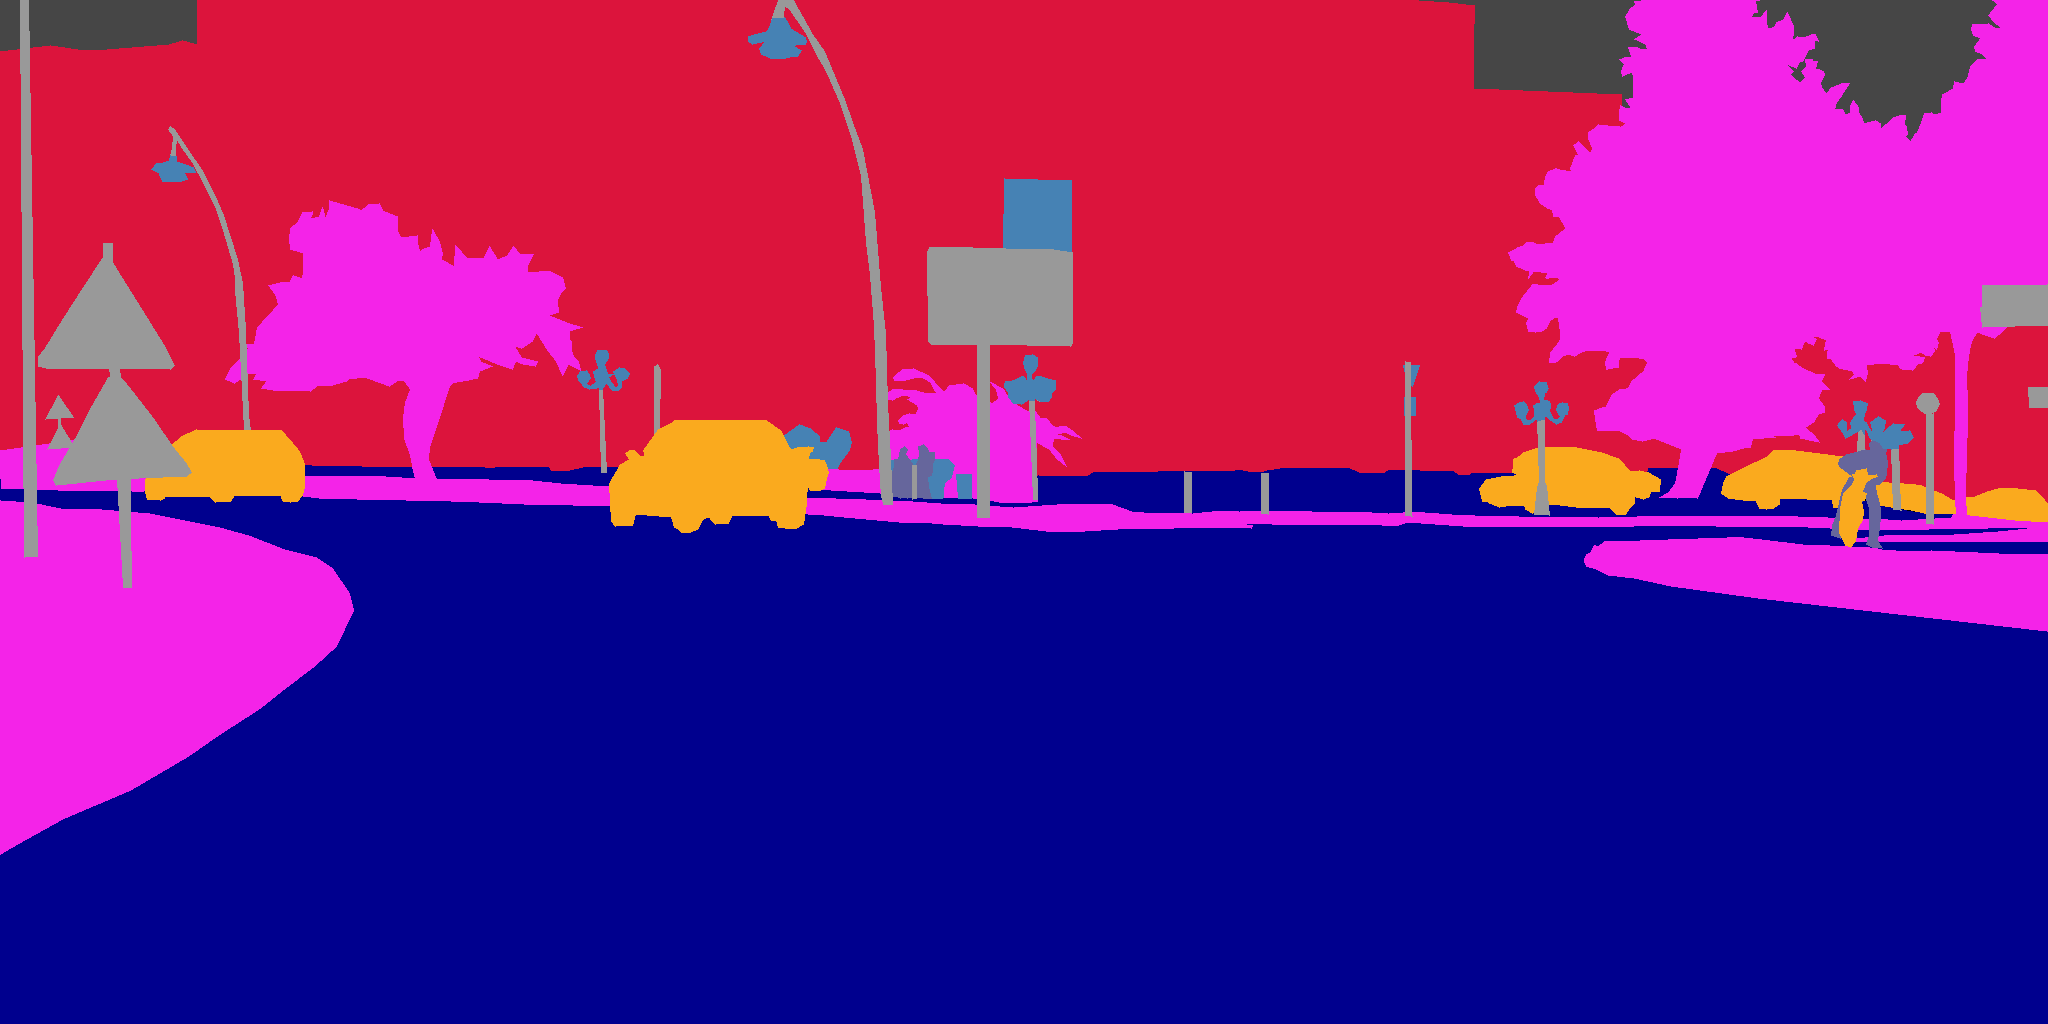

In [8]:
mask_path = "../Data/masks/aachen_000000_000019.png"
mask1 = Image.open(mask_path)
mask1

In [9]:
diff = ImageChops.difference(mask1, test1)

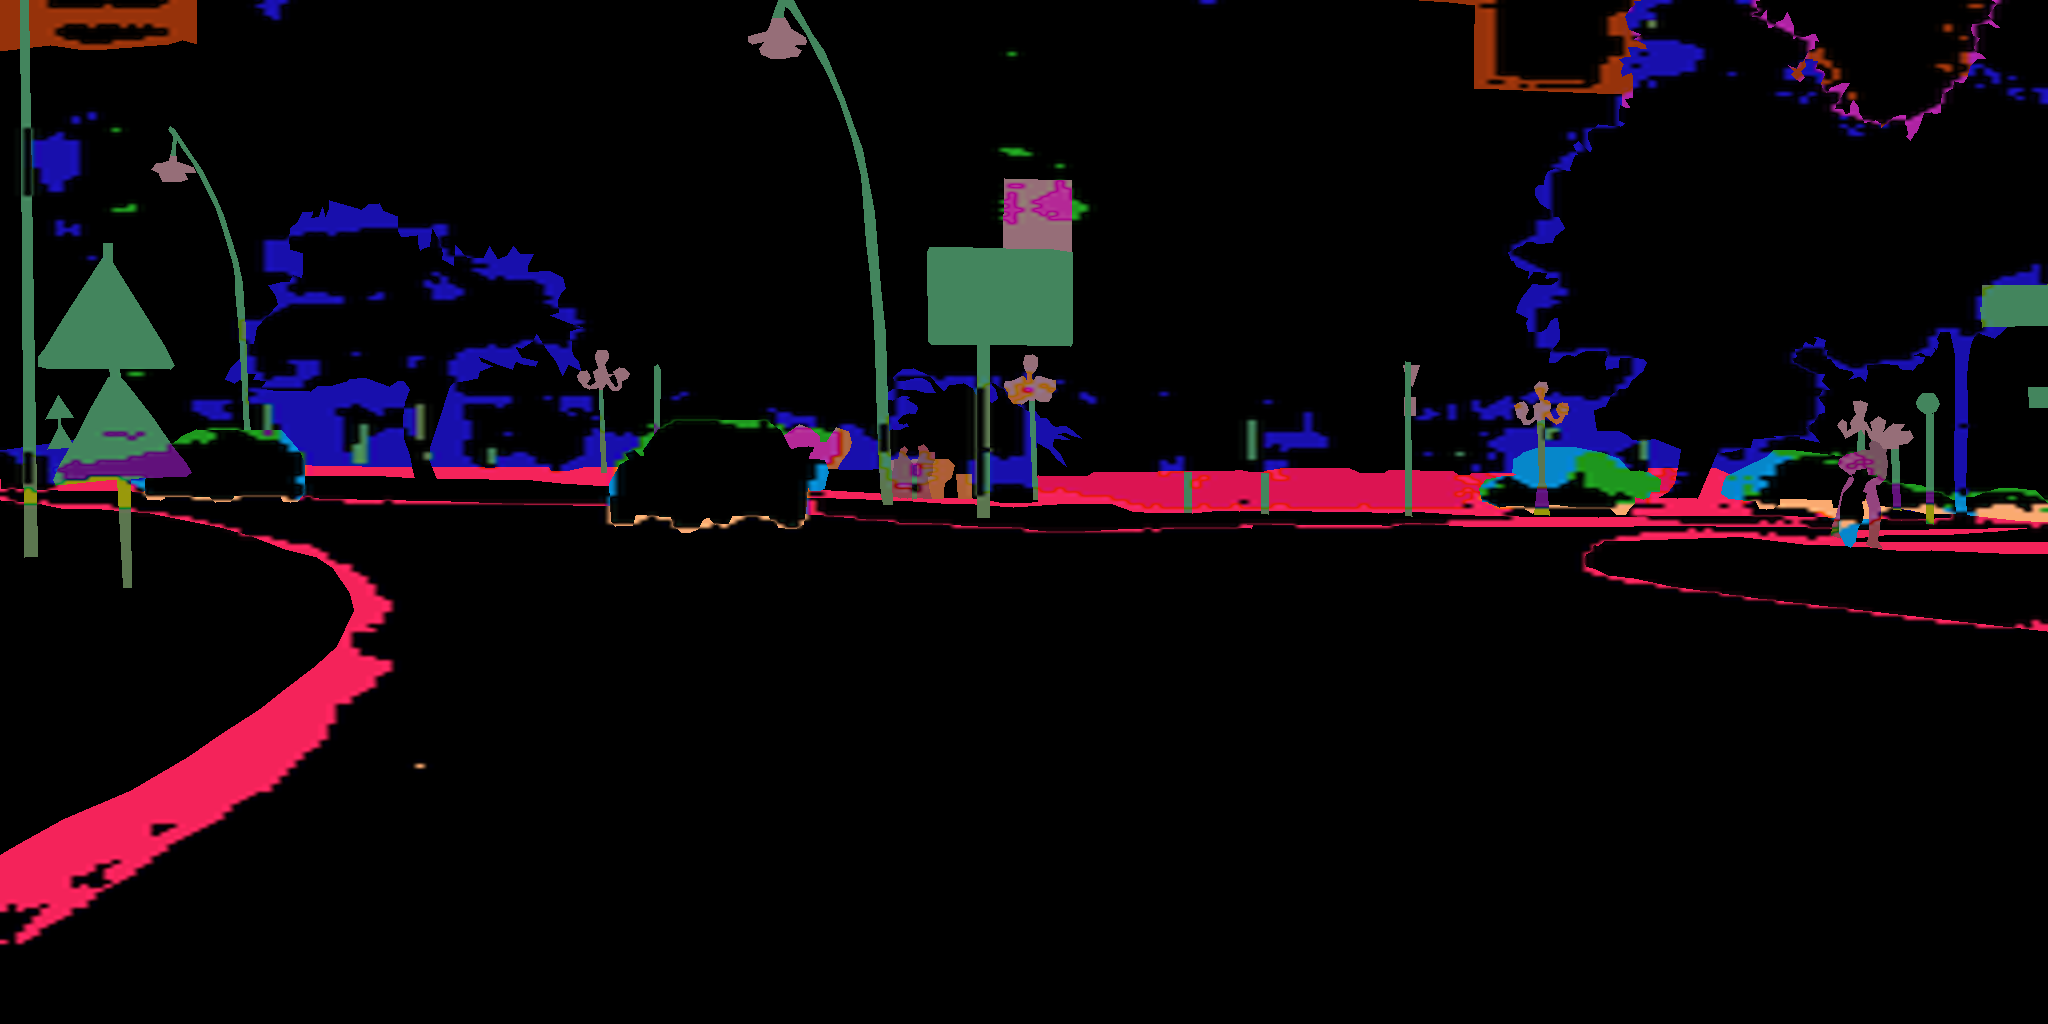

In [10]:
diff

In [13]:
maskX = img_to_array(mask1)
testX = img_to_array(test1)
maskX = maskX.astype(np.uint8)
testX = testX.astype(np.uint8)

In [20]:
tab_0 = [] #""" VEHICLE """
tab_1 = [] #""" FLAT """
tab_2 = [] #""" HUMAN """
tab_3 = [] #""" CONSTRUCTION """
tab_4 = [] #""" OBJECT """
tab_5 = [] #""" NATURE """
tab_6 = [] #""" SKY """
tab_7 = [] #""" VOID """

In [27]:
for x in range(maskX.shape[0]):
    for y in range(maskX.shape[1]):
        if (maskX[x, y] == [250, 170, 30]).all():
            if (testX[x, y] == maskX[x, y]).all():
                tab_0.append(1)
            else:
              tab_0.append(0)        
        elif (maskX[x, y] == [0, 0, 142]).all():
            if (testX[x, y] == maskX[x, y]).all():
                tab_1.append(1)
            else:
              tab_1.append(0)
        elif (maskX[x, y] == [102, 102, 156]).all():
            if (testX[x, y] == maskX[x, y]).all():
                tab_2.append(1)
            else:
              tab_2.append(0)
        elif (maskX[x, y] == [220, 20, 60]).all():
            if (testX[x, y] == maskX[x, y]).all():
                tab_3.append(1)
            else:
              tab_3.append(0)
        elif (maskX[x, y] == [153, 153, 153]).all():
            if (testX[x, y] == maskX[x, y]).all():
                tab_4.append(1)
            else:
              tab_4.append(0)
        elif (maskX[x, y] == [244, 35, 232]).all():
            if (testX[x, y] == maskX[x, y]).all():
                tab_5.append(1)
            else:
              tab_5.append(0)
        elif (maskX[x, y] == [70, 70, 70]).all():
            if (testX[x, y] == maskX[x, y]).all():
                tab_6.append(1)
            else:
              tab_6.append(0)
        elif (maskX[x, y] == [70, 130, 180]).all():
            if (testX[x, y] == maskX[x, y]).all():
                tab_7.append(1)
            else:
              tab_7.append(0)

In [31]:
print(f'VEHICLE :{np.mean(tab_0)}')
print(f'FLAT :{np.mean(tab_1)}')
print(f'HUMAN :{np.mean(tab_2)}')
print(f'CONSTRUCTION :{np.mean(tab_3)}')
print(f'OBJECT :{np.mean(tab_4)}')
print(f'NATURE :{np.mean(tab_5)}')
print(f'SKY :{np.mean(tab_6)}')
print(f'VOID :{np.mean(tab_7)}')

VEHICLE :0.5150624378384352
FLAT :0.9067078098288694
HUMAN :0.0
CONSTRUCTION :0.8962569772924303
OBJECT :2.0071857248951246e-05
NATURE :0.7819510049871005
SKY :0.4793263674316579
VOID :0.0


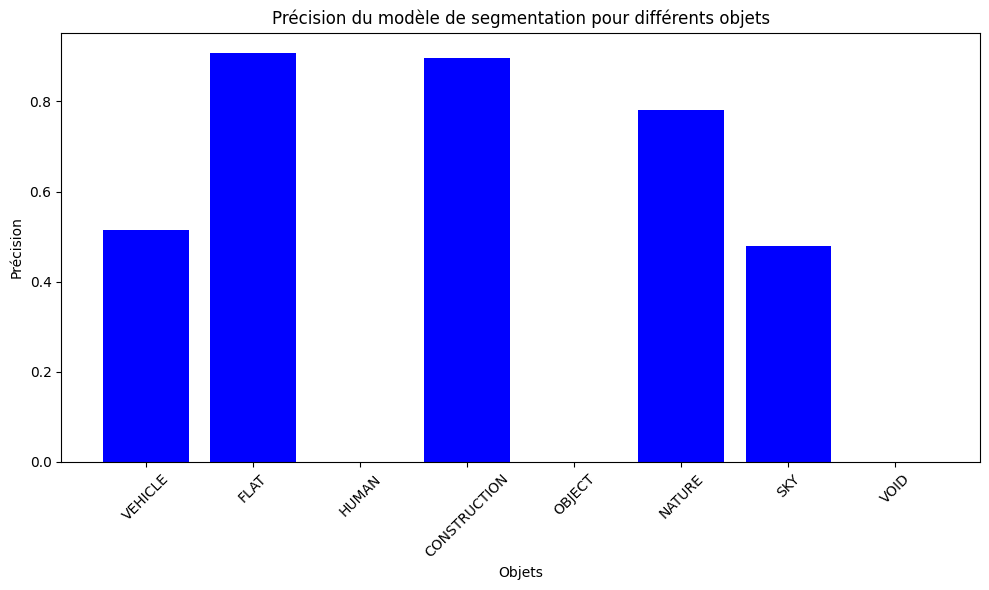

In [32]:
import matplotlib.pyplot as plt

# Définir les catégories et les valeurs
categories = ['VEHICLE', 'FLAT', 'HUMAN', 'CONSTRUCTION', 'OBJECT', 'NATURE', 'SKY', 'VOID']
precisions = [0.5150624378384352, 0.9067078098288694, 0.0, 0.8962569772924303, 2.0071857248951246e-05, 0.7819510049871005, 0.4793263674316579, 0.0]

# Créer le diagramme à barres
plt.figure(figsize=(10, 6))
plt.bar(categories, precisions, color='blue')

# Ajouter des titres et des étiquettes
plt.title('Précision du modèle de segmentation pour différents objets')
plt.xlabel('Objets')
plt.ylabel('Précision')
plt.xticks(rotation=45)  # Rotation des étiquettes sur l'axe des x pour une meilleure lisibilité

# Afficher le diagramme
plt.tight_layout()
plt.show()

/var/folders/kl/3nc79ycx61v13jbqlw61nnfw0000gn/T/ipykernel_1472/1356110308.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Category', y='Precision', data=df, palette=custom_colors)
/var/folders/kl/3nc79ycx61v13jbqlw61nnfw0000gn/T/ipykernel_1472/1356110308.py:26: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  ax = sns.barplot(x='Category', y='Precision', data=df, palette=custom_colors)


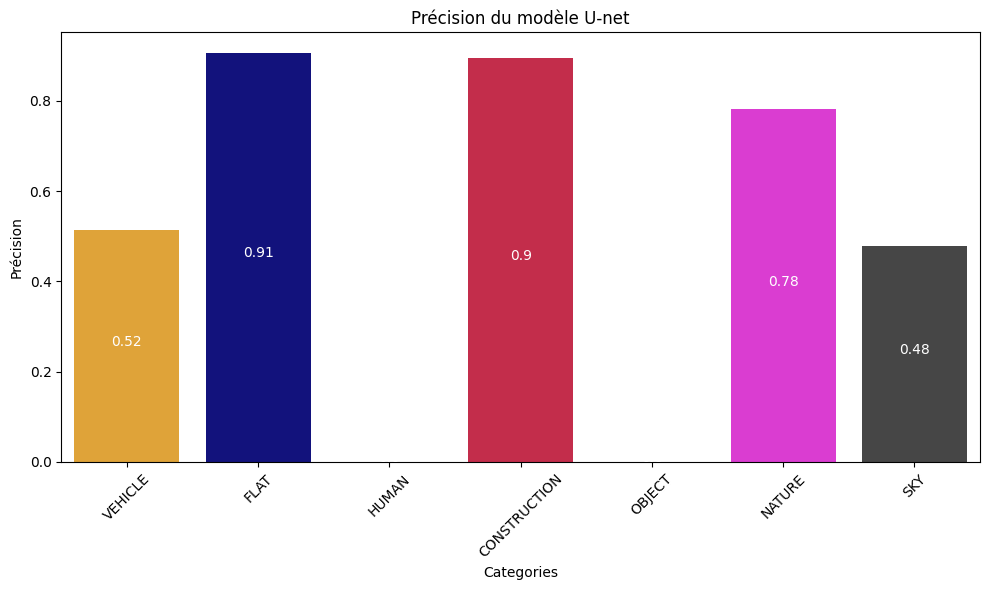

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Définir les catégories et les valeurs
categories = ['VEHICLE', 'FLAT', 'HUMAN', 'CONSTRUCTION', 'OBJECT', 'NATURE', 'SKY']
precisions = [0.5150624378384352, 0.9067078098288694, 0.0, 0.8962569772924303, 2.0071857248951246e-05, 0.7819510049871005, 0.4793263674316579]

custom_colors = [(250/255, 170/255, 30/255), (0/255, 0/255, 142/255), (102/255, 102/255, 156/255), 
                 (220/255, 20/255, 60/255), (153/255, 153/255, 153/255), (244/255, 35/255, 232/255), 
                 (70/255, 70/255, 70/255), (70/255, 130/255, 180/255)]

# Créer le DataFrame à partir des données
data = {'Category': categories, 'Precision': precisions}
df = pd.DataFrame(data)

# Utiliser Seaborn pour créer le diagramme à barres
plt.figure(figsize=(10, 6))

# Ajouter des titres et des étiquettes
plt.title('Précision du modèle U-net')
plt.xlabel('Categories')
plt.ylabel('Précision')
plt.xticks(rotation=45)  # Rotation des étiquettes sur l'axe des x pour une meilleure lisibilité

ax = sns.barplot(x='Category', y='Precision', data=df, palette=custom_colors)
for index, row in df.iterrows():
    ax.text(index, row['Precision'] / 2, round(row['Precision'], 2), color='white', ha="center")


# Afficher le diagramme
plt.tight_layout()
plt.show()